In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
from Funciones import * 

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 10

In [2]:
ruta_base  = os.path.dirname(os.path.abspath('./')) + '/'
ruta_datos = ruta_base + 'Datos/'
ruta_shp   = ruta_datos+ 'Shapefiles/'
ruta_imagenes = ruta_base + 'Imagenes/'

### Series de precipitación

In [3]:
ruta_ppt = ruta_datos + 'Originales/PPT/'
ppt = pd.read_csv(ruta_ppt+'DF_PPT.csv', index_col=0, parse_dates=True)
ppt.index = pd.DatetimeIndex(ppt.index)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

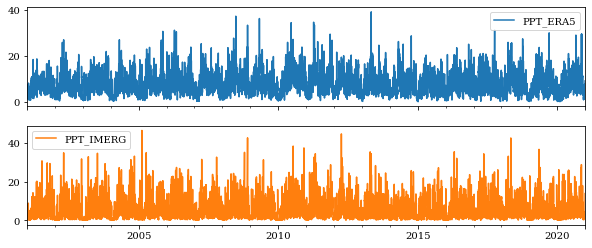

In [4]:
ppt.plot(subplots=True, figsize=(10,4))

array([[<AxesSubplot:xlabel='PPT_ERA5', ylabel='PPT_ERA5'>,
        <AxesSubplot:xlabel='PPT_IMERG', ylabel='PPT_ERA5'>],
       [<AxesSubplot:xlabel='PPT_ERA5', ylabel='PPT_IMERG'>,
        <AxesSubplot:xlabel='PPT_IMERG', ylabel='PPT_IMERG'>]],
      dtype=object)

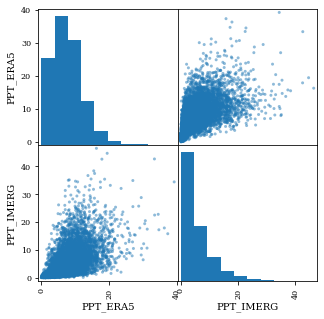

In [5]:
pd.plotting.scatter_matrix(ppt, figsize=(5,5))

In [6]:
ppt.corr()

,PPT_ERA5,PPT_IMERG
PPT_ERA5,1.00000,0.57898
PPT_IMERG,0.57898,1.00000


### Caudal

In [7]:
ruta_caudal = ruta_datos + 'Originales/Caudal/'
files = glob.glob(ruta_caudal+'*.csv')

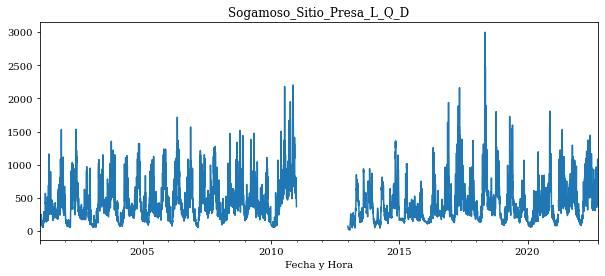

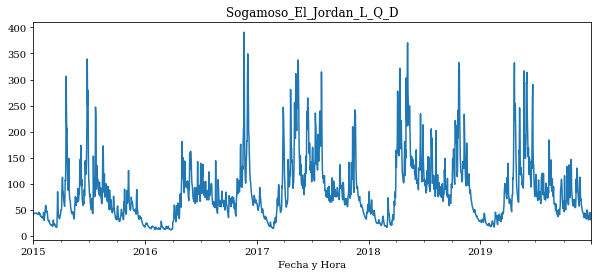

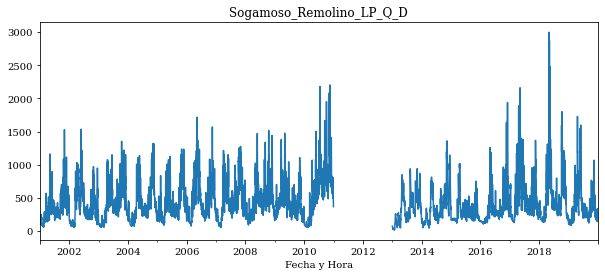

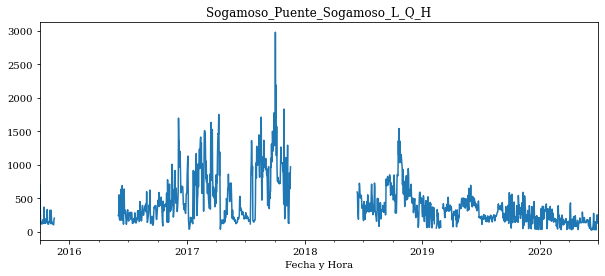

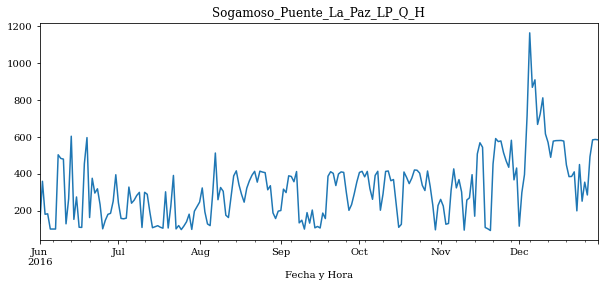

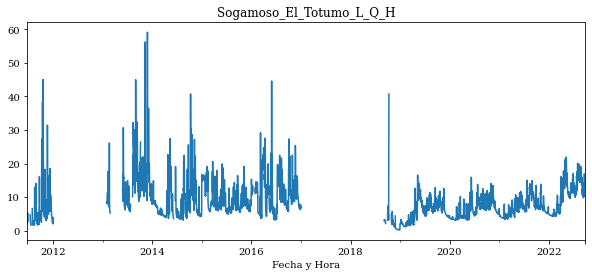

In [8]:
names_caudales = []
data_caudales  = []
# Tablazo el el de sitio de presa en un principio
for file in files:
    name = file.split('/')[-1].split('.')[0]
    names_caudales.append(name)
    serie = pd.read_csv(file, index_col=0)
    serie = serie['Valor'][serie['Unnamed: 2']==51.0]
    serie.index = pd.DatetimeIndex(serie.index)
    serie = serie.resample('d').mean()['2001':]
    data_caudales.append(serie.values)
    plt.figure(figsize=(10,4))
    serie.plot()
    plt.title(name)
    plt.show()
    plt.close('all')

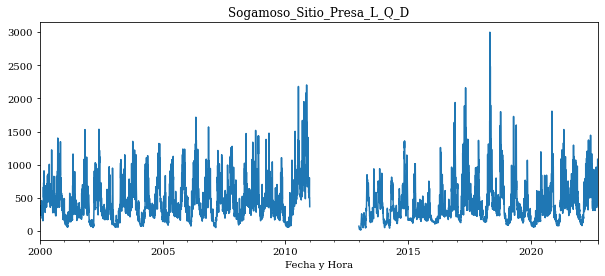

In [9]:
# Tablazo el el de sitio de presa en un principio

file = files[0]
name = file.split('/')[-1].split('.')[0]
serie = pd.read_csv(file, index_col=0)
serie = serie['Valor'][serie['Unnamed: 2']==51.0]
serie.index = pd.DatetimeIndex(serie.index)
serie = serie.resample('d').mean()['2000':]
plt.figure(figsize=(10,4))
serie.plot()
plt.title(name)
plt.show()
plt.close('all') 

In [10]:
caudal = pd.DataFrame(index = serie.index.values, data=serie.values, columns=['Caudal'])

In [11]:
caudal_antecedente = caudal.shift(1)

In [12]:
caudal_antecedente.columns = ['Caudal_antes']

### Series de ondas

In [13]:
ruta_ondas = ruta_datos + 'Originales/Ondas/'
files = glob.glob(ruta_ondas+'*')

In [14]:
names_ondas = []
data_ondas  = []

region = [(-76,8),(-70,8),(-70,3),(-78,3)]
for file in files:

    name   = file.split('/')[-1].split('.')[0].split('_')[0]
    data   = xr.open_dataset(file)
    lat    = np.array(data['lat'])
    lon    = np.array(data['lon'])
    time   = pd.DatetimeIndex(np.array(data['time']))
    data_s = np.array(data['olr_s'])
    data_a = np.array(data['olr_a'])

    for data_i, i in zip([data_s, data_a],['s','a']):
        names_ondas.append(name+'_'+i)
        data_ondas.append(Serie_Cuenca_P(Polygon_Generator(region,[]), Data=data_i, Latitudes=lat, Longitudes=lon, Fechas=time).values)

fechas = pd.DatetimeIndex(Serie_Cuenca_P(Polygon_Generator(region,[]), Data=data_i, Latitudes=lat, Longitudes=lon, Fechas=time).index)

ondas = pd.DataFrame(index=fechas, data = np.array(data_ondas).T, columns=names_ondas)

/mnt/g/My Drive/Maestría en Recursos Hidraulicos/IA y AU en geociencias/Trabajo_final/Scripts/Funciones.py:62: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(cut_data, axis=1)


In [15]:
ondas.drop(columns = ['EIG_s','MRG_s','WIG_a','TD_a','ER_a','Kelvin_a'], inplace=True)

In [16]:
ondas

,EIG_a,ER_s,Kelvin_s,MJO_s,MJO_a,MRG_a,TD_s,WIG_s
2001-02-02,3.472839,-2.538527,4.060272,-4.581935,-0.699003,1.043384,-4.896246,3.619513
2001-02-03,-0.933801,-1.033567,-1.525076,-4.702835,-0.704193,-2.067537,0.859960,-3.188267
2001-02-04,-2.512747,0.587908,-4.572494,-4.697544,-0.693261,-1.375889,3.592543,2.471776
2001-02-05,2.848997,1.901652,-4.984876,-4.565582,-0.665588,3.258563,-2.351354,-1.794038
2001-02-06,-1.166517,2.592392,-2.904190,-4.310416,-0.621030,3.303734,0.447085,1.261962
...,...,...,...,...,...,...,...,...
2020-11-16,-0.807936,5.253497,-10.202110,1.540721,-0.178269,-1.041809,1.241732,-2.408803
2020-11-17,1.727120,7.120134,-14.783565,1.128295,-0.022558,-1.260204,4.980706,2.914153
2020-11-18,-2.296233,7.695562,1.356259,0.699870,0.127739,0.155920,0.336406,-2.658446
2020-11-19,-4.791578,7.079211,11.807167,0.269720,0.268386,1.982399,0.526290,1.975691


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

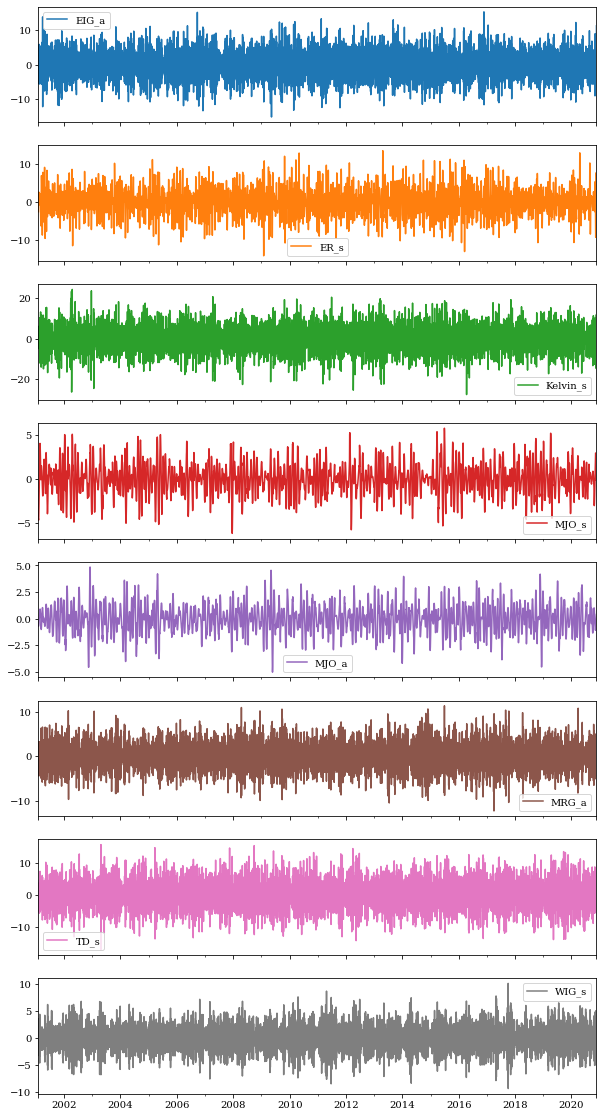

In [17]:
ondas.plot(subplots=True, figsize=(10,20))

In [18]:
print(lat)
print(lon)

[ 15.   12.5  10.    7.5   5.    2.5   0.   -2.5  -5.   -7.5 -10. ]
[-90.  -87.5 -85.  -82.5 -80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5
 -60.  -57.5 -55.  -52.5 -50.  -47.5 -45.  -42.5 -40. ]


### Cargando Chorros

In [19]:
ruta_chorros = ruta_datos + 'Originales/Chorros/'
files = glob.glob(ruta_chorros+'*')

In [20]:
names_chorros = []
data_chorros  = []

for file in files:
    names_chorros.append(file.split('/')[-1].split('.')[0])
    data_chorros.append(pd.read_csv(file, index_col=0).values)
    
fechas = pd.DatetimeIndex(pd.read_csv(file, index_col=0).index)

chorros = pd.DataFrame(index=fechas, data = np.concatenate(data_chorros, axis=1), columns=names_chorros)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

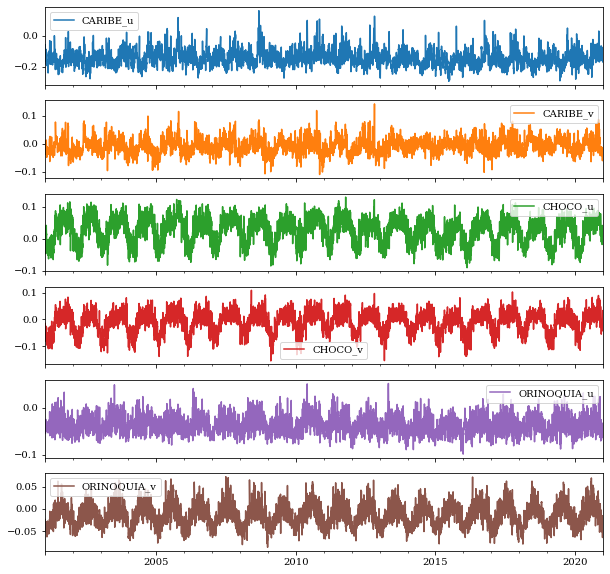

In [21]:
chorros.plot(subplots=True, figsize = (10,10))

In [22]:
# pd.plotting.scatter_matrix(chorros, figsize=(10,10))

In [23]:
# pd.plotting.scatter_matrix(ondas, figsize=(10,10))

 ### Precipitación acumulada

In [24]:
colums = ['ERA5', 'IMERG']
correlaciones = []

for ventana in range(1,40,1):

    periodos_min = ventana    
    correlaciones.append(pd.concat((ppt.rolling(window=ventana, min_periods=periodos_min).mean().shift(1), caudal), axis=1).corr().iloc[2,:-1].values)   
    

In [25]:
correlaciones = pd.DataFrame(data=np.array(correlaciones), columns=colums).drop('IMERG', axis=1)

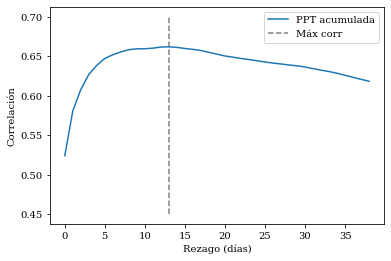

In [26]:
plt.plot(correlaciones, label = 'PPT acumulada')
plt.vlines(13, ymin=0.45,ymax=0.70, color='gray', ls='--', label='Máx corr')
plt.xlabel('Rezago (días)')
plt.ylabel('Correlación')
plt.legend()
plt.savefig(ruta_imagenes+'Precipitacion_antecedente.png', bbox_inches='tight', dpi=150)

In [27]:
ppt_antes = ppt.rolling(window=13, min_periods=13).sum().shift(1)
ppt_antes.columns = ['PPT_ERA_acum', 'PPT_IMERG_acum']

<AxesSubplot:>

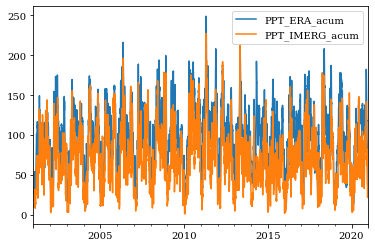

In [28]:
ppt_antes.plot()

### Tendencia del caudal

In [29]:
caudal_tendencia = caudal-caudal.shift(1)
caudal_tendencia = caudal_tendencia.shift(1)

In [30]:
caudal_tendencia.columns = ['Tendencia']

In [31]:
caudal_tendencia

,Tendencia
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,-58.260000
2000-01-04,11.330000
2000-01-05,-37.230000
...,...
2022-09-23,51.253975
2022-09-24,-7.589779
2022-09-25,399.093555
2022-09-26,50.625519


In [32]:
caudal

,Caudal
2000-01-01,371.180000
2000-01-02,312.920000
2000-01-03,324.250000
2000-01-04,287.020000
2000-01-05,377.660000
...,...
2022-09-23,635.086997
2022-09-24,1034.180552
2022-09-25,1084.806071
2022-09-26,538.911729


### Unir y guardar

In [33]:
# datos_unidos = pd.concat((ondas, chorros, ppt, ppt_antes, caudal_antecedente, caudal), axis=1)
datos_unidos = pd.concat((ondas, chorros, ppt.drop(columns = ['PPT_IMERG']), ppt_antes.drop(columns = ['PPT_IMERG_acum']), caudal_tendencia, caudal_antecedente, caudal), axis=1)

In [34]:
# pd.plotting.scatter_matrix(datos_unidos, figsize=(20,20))

In [35]:
# plt.figure(figsize=(12,12))
# sns.heatmap(datos_unidos.corr().round(2), annot=True)

In [36]:
datos_unidos.to_csv(ruta_datos + 'Datos.csv')